In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

cores = [1, 2, 4, 8, 16]

# Время выполнения для разных размеров матриц
runtime_500 = [0.502563, 0.315175, 0.194252, 0.130181, 0.0670426]
runtime_1000 = [3.12099, 1.90736, 1.00265, 0.639462, 0.315879]
runtime_1500 = [13.4787, 7.79651, 4.47795, 2.58978, 1.31829]

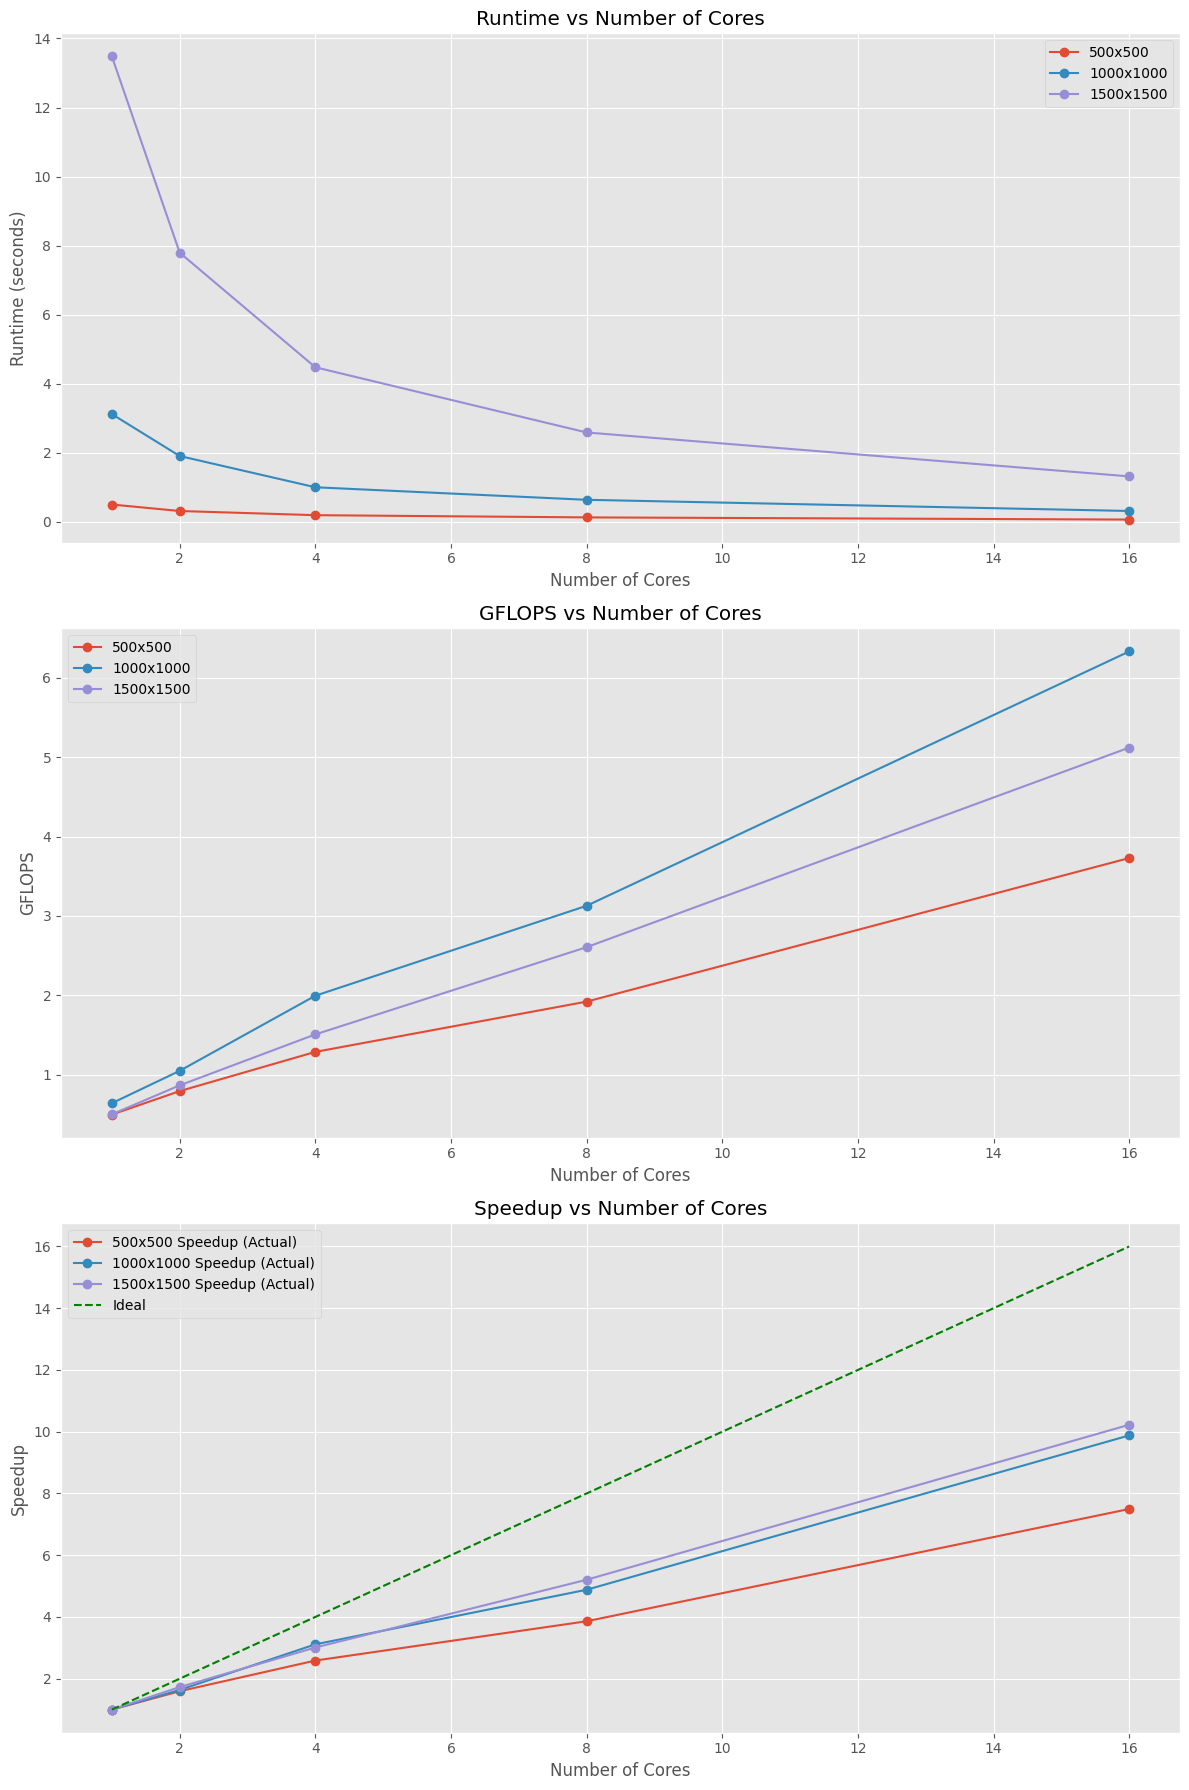

In [6]:
# Размеры операций для вычисления GFLOPS (число операций в умножении матрицы NxN)
flop_500 = 2 * (500 ** 3)
flop_1000 = 2 * (1000 ** 3)
flop_1500 = 2 * (1500 ** 3)

# GFLOPS для каждого размера матрицы
gflops_500 = [flop_500 / (time * 1e9) for time in runtime_500]
gflops_1000 = [flop_1000 / (time * 1e9) for time in runtime_1000]
gflops_1500 = [flop_1500 / (time * 1e9) for time in runtime_1500]

speedup_500 = [runtime_500[0] / rt for rt in runtime_500]
speedup_1000 = [runtime_1000[0] / rt for rt in runtime_1000]
speedup_1500 = [runtime_1500[0] / rt for rt in runtime_1500]

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# График времени выполнения
axs[0].plot(cores, runtime_500, marker='o', label='500x500')
axs[0].plot(cores, runtime_1000, marker='o', label='1000x1000')
axs[0].plot(cores, runtime_1500, marker='o', label='1500x1500')
axs[0].set_title('Runtime vs Number of Cores')
axs[0].set_xlabel('Number of Cores')
axs[0].set_ylabel('Runtime (seconds)')
axs[0].legend()
axs[0].grid(True)

# График GFLOPS
axs[1].plot(cores, gflops_500, marker='o', label='500x500')
axs[1].plot(cores, gflops_1000, marker='o', label='1000x1000')
axs[1].plot(cores, gflops_1500, marker='o', label='1500x1500')
axs[1].set_title('GFLOPS vs Number of Cores')
axs[1].set_xlabel('Number of Cores')
axs[1].set_ylabel('GFLOPS')
axs[1].legend()
axs[1].grid(True)

# График ускорения
axs[2].plot(cores, speedup_500, marker='o', label='500x500 Speedup (Actual)')
axs[2].plot(cores, speedup_1000, marker='o', label='1000x1000 Speedup (Actual)')
axs[2].plot(cores, speedup_1500, marker='o', label='1500x1500 Speedup (Actual)')
axs[2].plot(cores, cores, linestyle='--', color='green', label='Ideal')
axs[2].set_title('Speedup vs Number of Cores')
axs[2].set_xlabel('Number of Cores')
axs[2].set_ylabel('Speedup')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
